In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [321]:
df = pd.read_csv("ipl.csv")
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [323]:
df.dtypes==object

mid               False
date               True
venue              True
bat_team           True
bowl_team          True
batsman            True
bowler             True
runs              False
wickets           False
overs             False
runs_last_5       False
wickets_last_5    False
striker           False
non-striker       False
total             False
dtype: bool

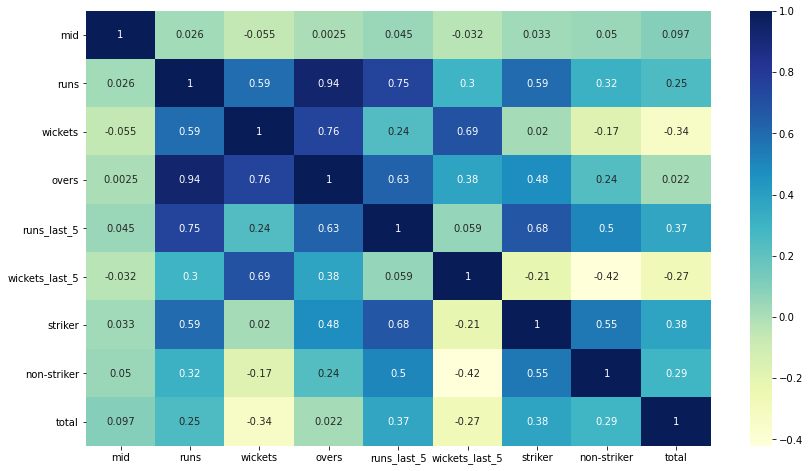

In [324]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [325]:
def barplot(category,numeric):
    group = df.groupby(category)[numeric].mean().sort_values(ascending=False).head(10).reset_index()
    fig = px.bar(group,x=category,y=numeric,color=category,title=f"{numeric} for {category}")
    fig.show()

In [326]:
df.drop(columns=['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker'], axis=1, inplace=True)
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [327]:
barplot("bat_team","total")

In [328]:
df['bat_team'] = df['bat_team'].replace({"Rising Pune Supergiant":"Rising Pune Supergiants"})
df['bowl_team'] = df['bowl_team'].replace({"Rising Pune Supergiant":"Rising Pune Supergiants"})

In [329]:
bat = df['bat_team'].unique()

In [330]:
len(bat)

13

In [331]:
bowl = df['bowl_team'].unique()

In [332]:
len(bowl)

13

In [333]:
set(bat).intersection(set(bowl))

{'Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad'}

In [334]:
len(set(bat).intersection(set(bowl)))

13

In [335]:
good_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [336]:
max(df['overs'])

19.6

In [337]:
df = df[(df['bat_team'].isin(good_teams)) & (df['bowl_team'].isin(good_teams))]
df

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222
...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107


In [338]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [339]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df.dtypes

date              datetime64[ns]
bat_team                  object
bowl_team                 object
runs                       int64
wickets                    int64
overs                    float64
runs_last_5                int64
wickets_last_5             int64
total                      int64
dtype: object

In [340]:
df = df[df['overs']>=5.0]

In [341]:
categorical = df.columns[df.dtypes=='object']
categorical

Index(['bat_team', 'bowl_team'], dtype='object')

In [342]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder() 
mapping_dict = {}
for col in categorical:
    df[col]=labelEncoder.fit_transform(df[col])
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict) 

{'bat_team': {'Chennai Super Kings': 0, 'Delhi Daredevils': 1, 'Kings XI Punjab': 2, 'Kolkata Knight Riders': 3, 'Mumbai Indians': 4, 'Rajasthan Royals': 5, 'Royal Challengers Bangalore': 6, 'Sunrisers Hyderabad': 7}, 'bowl_team': {'Chennai Super Kings': 0, 'Delhi Daredevils': 1, 'Kings XI Punjab': 2, 'Kolkata Knight Riders': 3, 'Mumbai Indians': 4, 'Rajasthan Royals': 5, 'Royal Challengers Bangalore': 6, 'Sunrisers Hyderabad': 7}}


c:\users\karti\miniconda3\envs\kartik\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [343]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,3,6,61,0,5.1,59,0,222
33,2008-04-18,3,6,61,1,5.2,59,1,222
34,2008-04-18,3,6,61,1,5.3,59,1,222
35,2008-04-18,3,6,61,1,5.4,59,1,222
36,2008-04-18,3,6,61,1,5.5,58,1,222


In [344]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [345]:
X

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5
32,2008-04-18,3,6,61,0,5.1,59,0
33,2008-04-18,3,6,61,1,5.2,59,1
34,2008-04-18,3,6,61,1,5.3,59,1
35,2008-04-18,3,6,61,1,5.4,59,1
36,2008-04-18,3,6,61,1,5.5,58,1
...,...,...,...,...,...,...,...,...
75884,2017-05-19,3,4,106,9,18.1,29,4
75885,2017-05-19,3,4,107,9,18.2,29,4
75886,2017-05-19,3,4,107,9,18.3,28,4
75887,2017-05-19,3,4,107,9,18.4,24,4


In [346]:
y

32       222
33       222
34       222
35       222
36       222
        ... 
75884    107
75885    107
75886    107
75887    107
75888    107
Name: total, Length: 40108, dtype: int64

In [347]:
X_train = df.drop(labels='total', axis=1)[df['date'].dt.year <= 2016]
X_test = df.drop(labels='total', axis=1)[df['date'].dt.year >= 2017]

y_train = df[df['date'].dt.year <= 2016]['total'].values
y_test = df[df['date'].dt.year >= 2017]['total'].values

In [348]:
X_train

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5
32,2008-04-18,3,6,61,0,5.1,59,0
33,2008-04-18,3,6,61,1,5.2,59,1
34,2008-04-18,3,6,61,1,5.3,59,1
35,2008-04-18,3,6,61,1,5.4,59,1
36,2008-04-18,3,6,61,1,5.5,58,1
...,...,...,...,...,...,...,...,...
68857,2016-05-29,7,6,194,7,19.2,54,4
68858,2016-05-29,7,6,200,7,19.3,56,4
68859,2016-05-29,7,6,201,7,19.4,56,4
68860,2016-05-29,7,6,202,7,19.5,57,4


In [349]:
X_test

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5
68894,2017-04-05,7,6,46,1,5.1,42,1
68895,2017-04-05,7,6,50,1,5.2,46,1
68896,2017-04-05,7,6,50,1,5.3,44,1
68897,2017-04-05,7,6,54,1,5.4,48,1
68898,2017-04-05,7,6,58,1,5.5,51,1
...,...,...,...,...,...,...,...,...
75884,2017-05-19,3,4,106,9,18.1,29,4
75885,2017-05-19,3,4,107,9,18.2,29,4
75886,2017-05-19,3,4,107,9,18.3,28,4
75887,2017-05-19,3,4,107,9,18.4,24,4


In [350]:
X_train.drop(columns=['date'],axis=1,inplace=True)
X_test.drop(columns=['date'],axis=1,inplace=True)

In [351]:
X_test

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5
68894,7,6,46,1,5.1,42,1
68895,7,6,50,1,5.2,46,1
68896,7,6,50,1,5.3,44,1
68897,7,6,54,1,5.4,48,1
68898,7,6,58,1,5.5,51,1
...,...,...,...,...,...,...,...
75884,3,4,106,9,18.1,29,4
75885,3,4,107,9,18.2,29,4
75886,3,4,107,9,18.3,28,4
75887,3,4,107,9,18.4,24,4


In [352]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-321.83528436710577


In [353]:
prediction=ridge_regressor.predict(X_test)

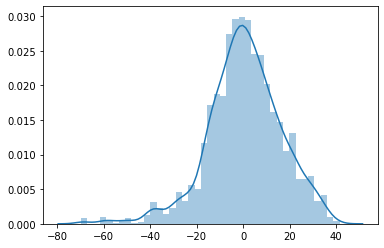

In [354]:
sns.distplot(y_test-prediction)

In [355]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.118283826553949
MSE: 255.35504162176474
RMSE: 15.979832340227


In [356]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [357]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

c:\users\karti\miniconda3\envs\kartik\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4203621.85091399, tolerance: 2529.955696594559

c:\users\karti\miniconda3\envs\kartik\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4593014.15342269, tolerance: 2547.038071028663

c:\users\karti\miniconda3\envs\kartik\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4710779.047293129, tolerance: 2667.8126904366472

c:\users\karti\miniconda3\envs\kartik\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of

{'alpha': 1}
-321.62757989646076


In [358]:
prediction=lasso_regressor.predict(X_test)

In [359]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.212444052230937
MSE: 262.32609608002986
RMSE: 16.19648406537758


In [360]:
import pickle
filename = 'ipl_ridge.pkl'
pickle.dump(ridge_regressor, open(filename, 'wb'))

In [361]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Train Accuracy Score :",rf.score(X_train, y_train))
print("Test Accuracy Score :",rf.score(X_test, y_test))

Train Accuracy Score : 0.9913976268208528
Test Accuracy Score : 0.643239952453472


In [362]:
import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("Train Accuracy Score :",xgb.score(X_train, y_train))
print("Test Accuracy Score :",xgb.score(X_test, y_test))

Train Accuracy Score : 0.8766309759041999
Test Accuracy Score : 0.7124866550364488


In [363]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 13.08560647271021
MSE: 291.3098627792508
RMSE: 17.067801931685604
